In [ ]:
# Iris Species Classification using Decision Tree Classifier
# This script demonstrates complete ML pipeline from data loading to model evaluation

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

print("=== IRIS SPECIES CLASSIFICATION USING DECISION TREE ===\n")


=== IRIS SPECIES CLASSIFICATION USING DECISION TREE ===



In [ ]:
# Step 1: Load and Explore the Dataset
print("Step 1: Loading and Exploring the Dataset")
print("-" * 50)

# Load the Iris dataset from sklearn
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Target: species (0: setosa, 1: versicolor, 2: virginica)

# Create a DataFrame for better data manipulation
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print(f"Dataset shape: {df.shape}")
print(f"Feature names: {list(iris.feature_names)}")
print(f"Target classes: {list(iris.target_names)}")
print(f"\nFirst 5 rows:")
print(df.head())

Step 1: Loading and Exploring the Dataset
--------------------------------------------------
Dataset shape: (150, 6)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  


In [ ]:
# Step 2: Data Preprocessing
print("\n\nStep 2: Data Preprocessing")
print("-" * 50)

# Check for missing values
print(f"Missing values per column:")
print(df.isnull().sum())

# Check data types
print(f"\nData types:")
print(df.dtypes)

# Basic statistics
print(f"\nBasic statistics:")
print(df.describe())

# Check class distribution
print(f"\nClass distribution:")
print(df['species_name'].value_counts())

# The Iris dataset is clean and well-structured, so minimal preprocessing is needed
# Features are already numerical, no missing values, and labels are already encoded

# Step 3: Feature and Target Separation
print("\n\nStep 3: Feature and Target Separation")
print("-" * 50)

# Separate features and target
X = df[iris.feature_names].values  # Feature matrix
y = df['species'].values  # Target vector

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Step 4: Train-Test Split
print("\n\nStep 4: Train-Test Split")
print("-" * 50)

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Ensure balanced split across classes
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Training class distribution: {np.bincount(y_train)}")
print(f"Testing class distribution: {np.bincount(y_test)}")




Step 2: Data Preprocessing
--------------------------------------------------
Missing values per column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64

Data types:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int64
species_name          object
dtype: object

Basic statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
ma

In [ ]:
# Step 5: Model Training
print("\n\nStep 5: Model Training")
print("-" * 50)

# Initialize the Decision Tree Classifier
# Using some hyperparameters to prevent overfitting
dt_classifier = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,  # Limit tree depth to prevent overfitting
    min_samples_split=5,  # Minimum samples required to split a node
    min_samples_leaf=2,  # Minimum samples required at leaf node
    criterion='gini'  # Splitting criterion
)

# Train the model
dt_classifier.fit(X_train, y_train)

print("Decision Tree Classifier trained successfully!")
print(f"Tree depth: {dt_classifier.get_depth()}")
print(f"Number of leaves: {dt_classifier.get_n_leaves()}")



Step 5: Model Training
--------------------------------------------------
Decision Tree Classifier trained successfully!
Tree depth: 3
Number of leaves: 5


In [ ]:
# Step 6: Model Evaluation
print("\n\nStep 6: Model Evaluation")
print("-" * 50)

# Make predictions on test set
y_pred = dt_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Model Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")

# Detailed classification report
print(f"\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion Matrix
print(f"\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Step 7: Feature Importance Analysis
print("\n\nStep 7: Feature Importance Analysis")
print("-" * 50)

# Get feature importances
feature_importance = dt_classifier.feature_importances_
feature_names = iris.feature_names

# Create feature importance DataFrame
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("Feature Importance Ranking:")
for idx, row in importance_df.iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

# Step 8: Model Predictions on New Data
print("\n\nStep 8: Sample Predictions")
print("-" * 50)

# Make predictions on a few test samples
sample_indices = [0, 1, 2]  # First 3 test samples
sample_predictions = dt_classifier.predict(X_test[sample_indices])
sample_probabilities = dt_classifier.predict_proba(X_test[sample_indices])

print("Sample Predictions:")
for i, idx in enumerate(sample_indices):
    actual = iris.target_names[y_test[idx]]
    predicted = iris.target_names[sample_predictions[i]]
    confidence = np.max(sample_probabilities[i])

    print(f"Sample {i+1}:")
    print(f"  Features: {X_test[idx]}")
    print(f"  Actual: {actual}")
    print(f"  Predicted: {predicted}")
    print(f"  Confidence: {confidence:.4f}")
    print(f"  Correct: {'Yes' if actual == predicted else 'No'}")
    print()

# Step 9: Cross-Validation for Robust Evaluation
print("\n\nStep 9: Cross-Validation")
print("-" * 50)

from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dt_classifier, X, y, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")




Step 6: Model Evaluation
--------------------------------------------------
Model Performance Metrics:
Accuracy: 0.9667
Precision (weighted): 0.9697
Recall (weighted): 0.9667

Detailed Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


Step 7: Feature Importance Analysis
--------------------------------------------------
Feature Importance Ranking:
petal length (cm): 0.5791
petal width (cm): 0.4209
sepal width (cm): 0.0000
sepal length (cm): 0.0000


Step 8: Sample Predictions
--------------------------------------------------
Sample Predictions:
Sample 1:
  Features: [4.4 3.  1.3



Step 10: Creating Visualizations
--------------------------------------------------


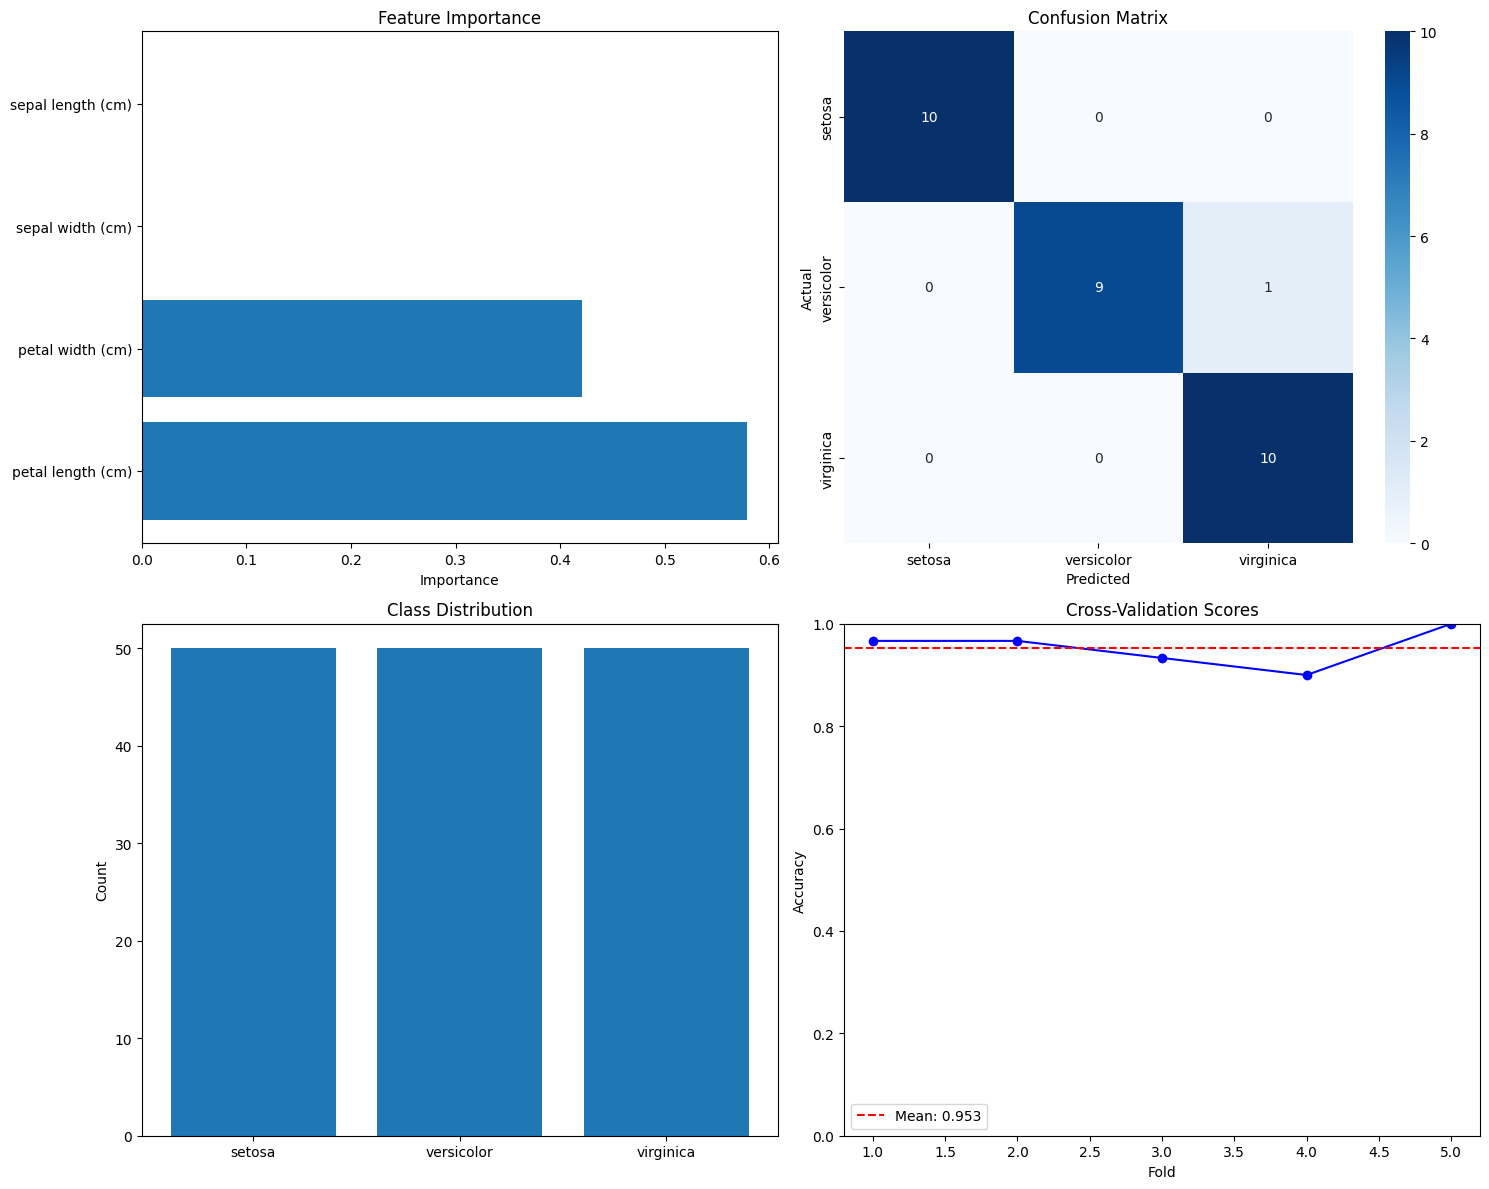

Visualizations created successfully!


In [ ]:
# Step 10: Visualization
print("\n\nStep 10: Creating Visualizations")
print("-" * 50)

try:
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Feature Importance Plot
    axes[0, 0].barh(importance_df['feature'], importance_df['importance'])
    axes[0, 0].set_title('Feature Importance')
    axes[0, 0].set_xlabel('Importance')

    # 2. Confusion Matrix Heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=iris.target_names,
                yticklabels=iris.target_names, ax=axes[0, 1])
    axes[0, 1].set_title('Confusion Matrix')
    axes[0, 1].set_xlabel('Predicted')
    axes[0, 1].set_ylabel('Actual')

    # 3. Class Distribution
    axes[1, 0].bar(iris.target_names, np.bincount(y))
    axes[1, 0].set_title('Class Distribution')
    axes[1, 0].set_ylabel('Count')

    # 4. Cross-Validation Scores
    axes[1, 1].plot(range(1, 6), cv_scores, 'bo-')
    axes[1, 1].axhline(y=cv_scores.mean(), color='r', linestyle='--',
                       label=f'Mean: {cv_scores.mean():.3f}')
    axes[1, 1].set_title('Cross-Validation Scores')
    axes[1, 1].set_xlabel('Fold')
    axes[1, 1].set_ylabel('Accuracy')
    axes[1, 1].legend()
    axes[1, 1].set_ylim(0, 1)

    plt.tight_layout()
    plt.show()

    print("Visualizations created successfully!")

except ImportError:
    print("Matplotlib/Seaborn not available. Skipping visualizations.")


In [ ]:
# Summary
print("\n\n" + "="*60)
print("SUMMARY")
print("="*60)
print(f"✓ Dataset: Iris Species ({X.shape[0]} samples, {X.shape[1]} features)")
print(f"✓ Model: Decision Tree Classifier")
print(f"✓ Accuracy: {accuracy:.4f}")
print(f"✓ Precision: {precision:.4f}")
print(f"✓ Recall: {recall:.4f}")
print(f"✓ Cross-Validation Mean Accuracy: {cv_scores.mean():.4f}")
print(f"✓ Most Important Feature: {importance_df.iloc[0]['feature']}")
print("\nThe model successfully classifies iris species with high accuracy!")
print("="*60)



SUMMARY
✓ Dataset: Iris Species (150 samples, 4 features)
✓ Model: Decision Tree Classifier
✓ Accuracy: 0.9667
✓ Precision: 0.9697
✓ Recall: 0.9667
✓ Cross-Validation Mean Accuracy: 0.9533
✓ Most Important Feature: petal length (cm)

The model successfully classifies iris species with high accuracy!
